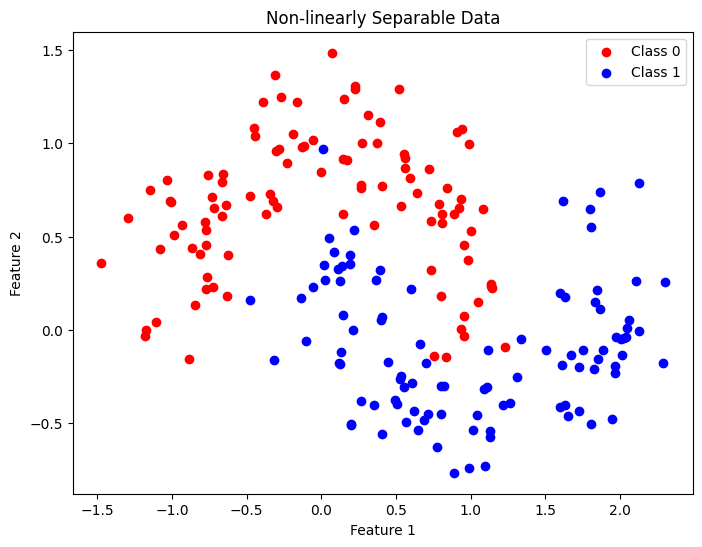

In [38]:
# Q1 - Generate non-linearly separable data

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Create a non-linear data
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Plot the figure
plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 1')
plt.title("Non-linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


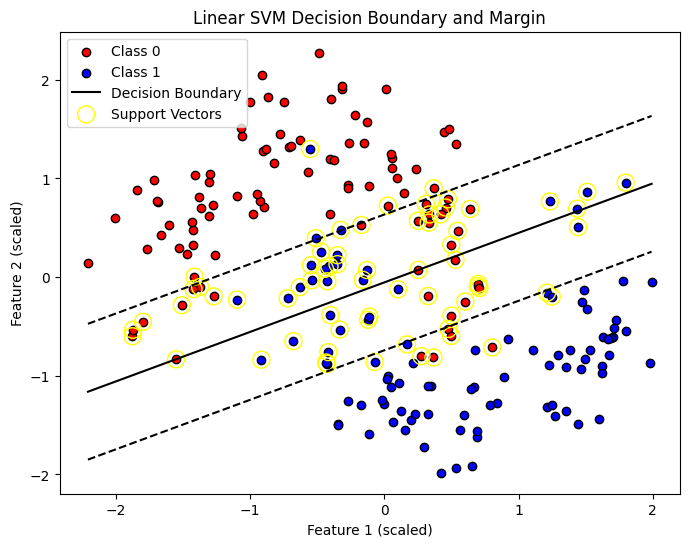

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       100
           1       0.85      0.80      0.82       100

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

Misclassification Rate: 0.17
Margin size: 0.688
Number of support vectors: 70


In [43]:
#Q2- Linear SVM

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Linear SVM
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_scaled, y)

# Plot decision boundary and support vectors
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[y==0, 0], X_scaled[y==0, 1], color='red', label='Class 0', edgecolor='k')
plt.scatter(X_scaled[y==1, 0], X_scaled[y==1, 1], color='blue', label='Class 1', edgecolor='k')

# Plot decision boundary
w = linear_svm.coef_[0]
b = linear_svm.intercept_[0]
x_plot = np.linspace(X_scaled[:,0].min(), X_scaled[:,0].max(), 100)
y_plot = -(w[0]*x_plot + b)/w[1]
plt.plot(x_plot, y_plot, 'k-', label='Decision Boundary')

# Plot margin
margin = 1 / np.sqrt(np.sum(w**2))
plt.plot(x_plot, y_plot + margin, 'k--')
plt.plot(x_plot, y_plot - margin, 'k--')

# Support vectors
plt.scatter(linear_svm.support_vectors_[:, 0], linear_svm.support_vectors_[:, 1],
            s=150, facecolors='none', edgecolors='yellow', label='Support Vectors')

plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title("Linear SVM Decision Boundary and Margin")
plt.legend()
plt.show()

# Predict
y_pred = linear_svm.predict(X_scaled)

# Performance metrics
report = classification_report(y, y_pred)
print(report)

# Misclassification rate
accuracy = accuracy_score(y, y_pred)
misclassification_rate = 1 - accuracy
print(f"Misclassification Rate: {misclassification_rate:.2f}")

# Margin size
print(f"Margin size: {margin:.3f}")

# Number of support vectors
print(f"Number of support vectors: {len(linear_svm.support_vectors_)}")


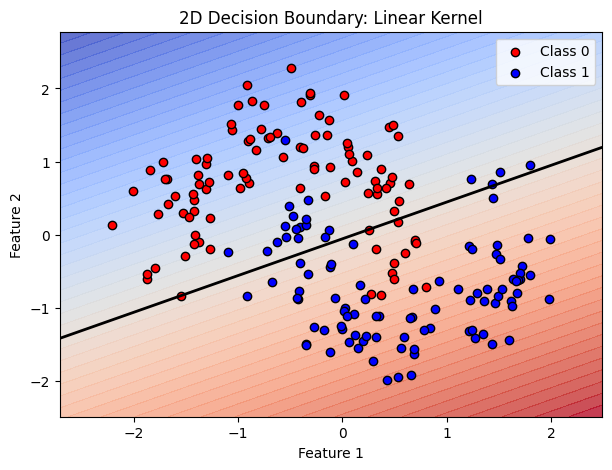

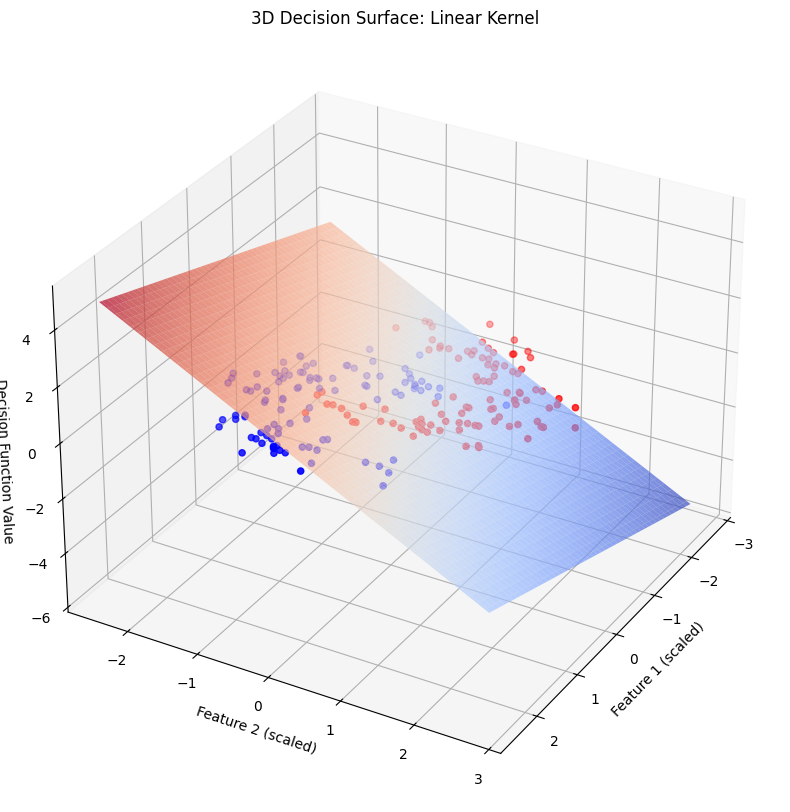


Classification Report for Linear Kernel:

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       100
           1       0.85      0.80      0.82       100

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



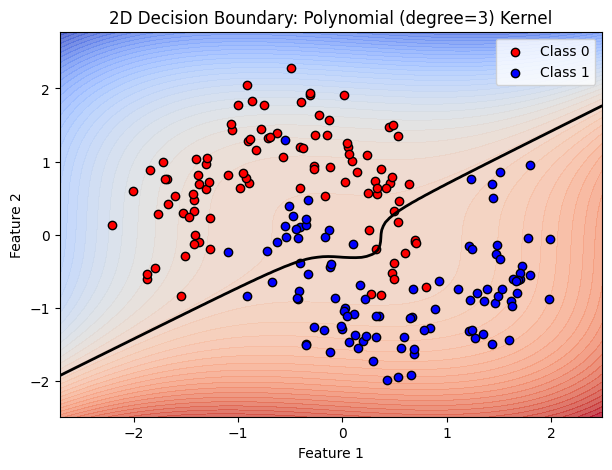

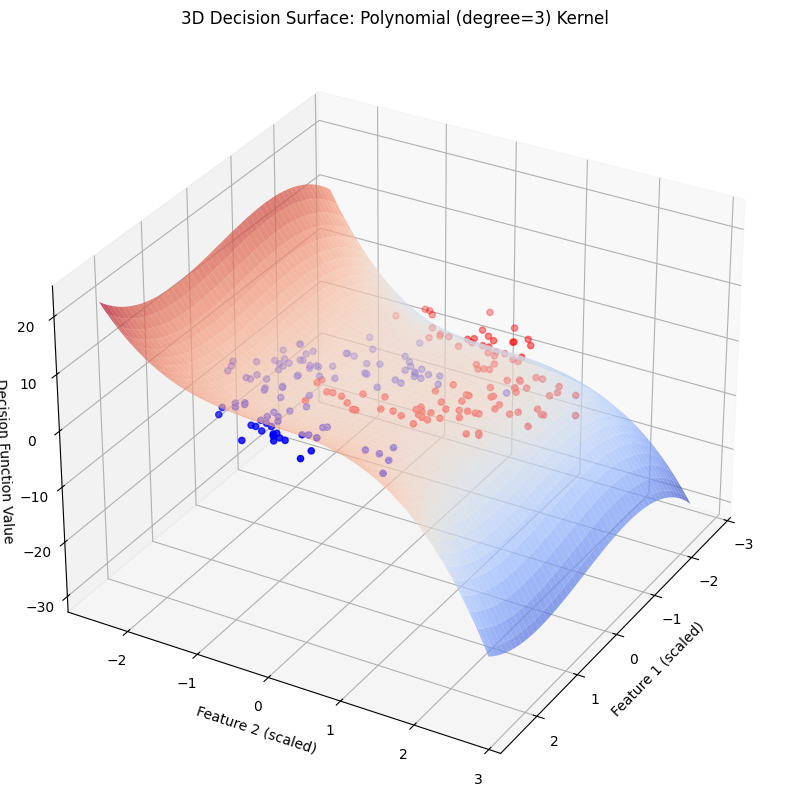


Classification Report for Polynomial (degree=3) Kernel:

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       100
           1       0.88      0.83      0.86       100

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



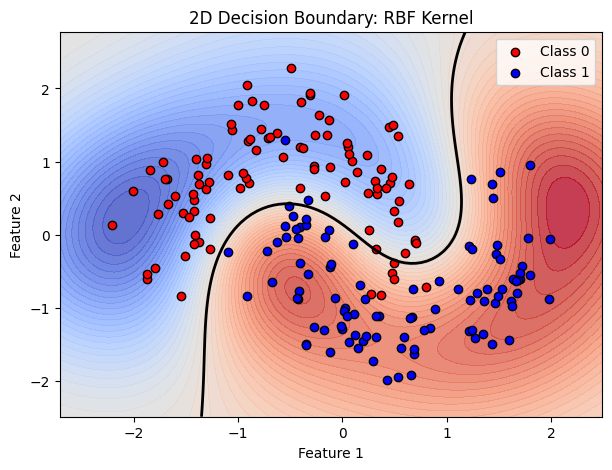

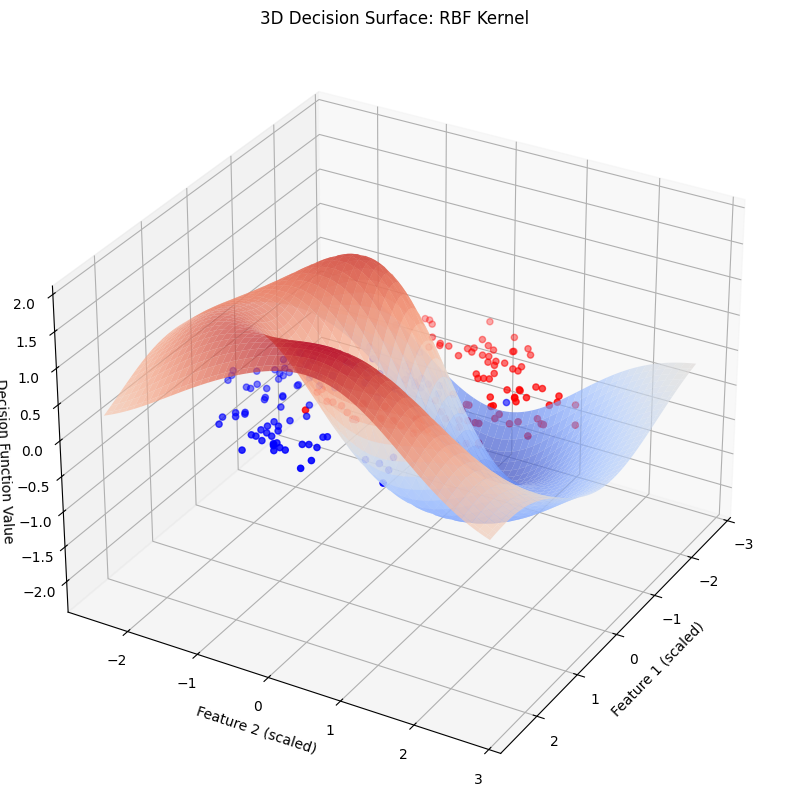


Classification Report for RBF Kernel:

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       100
           1       0.94      0.98      0.96       100

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [44]:
# Q3- Non-linear SVMs with different Kernels

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.metrics import classification_report

# Normalized data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Kernel settings
kernels = {
    'Linear': SVC(kernel='linear', C=1.0),
    'Polynomial (degree=3)': SVC(kernel='poly', degree=3, C=1.0),
    'RBF': SVC(kernel='rbf', C=1.0, gamma='scale')
}

# Create a meshgrid
xx, yy = np.meshgrid(
    np.linspace(X_scaled[:, 0].min()-0.5, X_scaled[:, 0].max()+0.5, 100),
    np.linspace(X_scaled[:, 1].min()-0.5, X_scaled[:, 1].max()+0.5, 100)
)

for name, model in kernels.items():
    # Train the model
    model.fit(X_scaled, y)

    # Decision function
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # ==== 2D Decision boundary ====
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap=plt.cm.coolwarm, alpha=0.8)
    plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)
    plt.scatter(X_scaled[y==0, 0], X_scaled[y==0, 1], color='red', label='Class 0', edgecolor='k')
    plt.scatter(X_scaled[y==1, 0], X_scaled[y==1, 1], color='blue', label='Class 1', edgecolor='k')
    plt.title(f'2D Decision Boundary: {name} Kernel')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

    # ==== 3D Decision Surface ====
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, Z, cmap=cm.coolwarm, alpha=0.7)
    ax.scatter(X_scaled[y==0, 0], X_scaled[y==0, 1], 0, color='red', label='Class 0')
    ax.scatter(X_scaled[y==1, 0], X_scaled[y==1, 1], 0, color='blue', label='Class 1')
    ax.set_title(f'3D Decision Surface: {name} Kernel')
    ax.set_xlabel("Feature 1 (scaled)")
    ax.set_ylabel("Feature 2 (scaled)")
    ax.set_zlabel("Decision Function Value", labelpad=2, rotation=0)
    ax.view_init(elev=30, azim=30)
    plt.show()

    # ==== Classification Report ====
    y_pred = model.predict(X_scaled)
    print(f"\nClassification Report for {name} Kernel:\n")
    print(classification_report(y, y_pred))


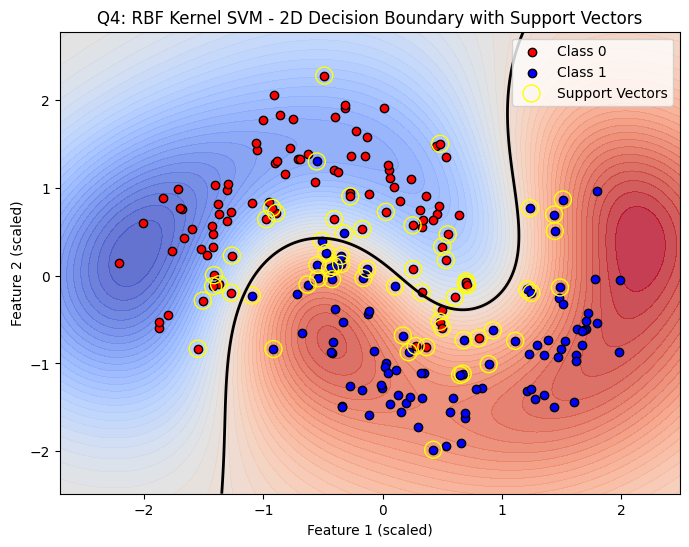

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       100
           1       0.94      0.98      0.96       100

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [42]:
# Q4 - 2D Decision Boundary and Support Vectors by using RBF Kernel

# Train the model
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_svm.fit(X_scaled, y)

# Create meshgrid
xx, yy = np.meshgrid(
    np.linspace(X_scaled[:, 0].min()-0.5, X_scaled[:, 0].max()+0.5, 300),
    np.linspace(X_scaled[:, 1].min()-0.5, X_scaled[:, 1].max()+0.5, 300)
)

# Decision function
Z = rbf_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap=plt.cm.coolwarm, alpha=0.8)
plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)

plt.scatter(X_scaled[y==0, 0], X_scaled[y==0, 1], color='red', label='Class 0', edgecolor='k')
plt.scatter(X_scaled[y==1, 0], X_scaled[y==1, 1], color='blue', label='Class 1', edgecolor='k')

# Support vectors
plt.scatter(rbf_svm.support_vectors_[:, 0], rbf_svm.support_vectors_[:, 1],
            s=150, facecolors='none', edgecolors='yellow', label='Support Vectors')

plt.title('Q4: RBF Kernel SVM - 2D Decision Boundary with Support Vectors')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()

# Performance Results
from sklearn.metrics import classification_report

y_pred_rbf = rbf_svm.predict(X_scaled)
print(classification_report(y, y_pred_rbf))
